In [1]:
import numpy as np
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt


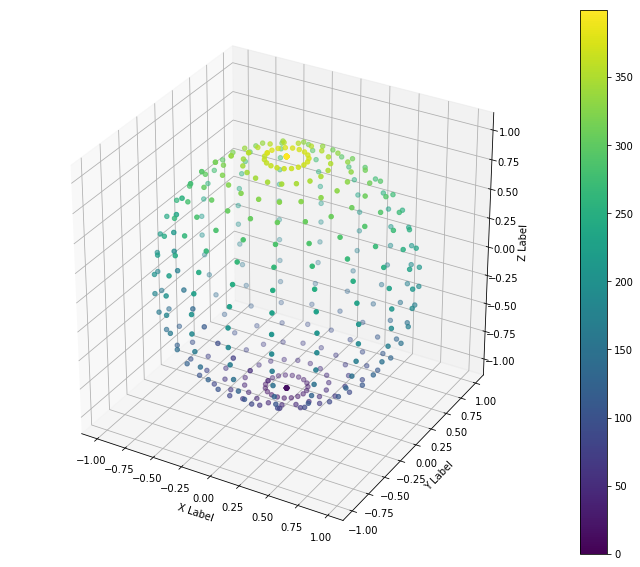

In [35]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')


theta = np.linspace(-np.pi/2,np.pi/2,20)
phi = np.linspace(-np.pi,np.pi,20)
r = 1
xs = []
ys = []
zs = []



for t in theta:
    for p in phi:
        xs.append(r*np.cos(t)*np.cos(p))
        ys.append(r*np.cos(t)*np.sin(p))
        zs.append(r*np.sin(t))
        
points = ax.scatter(xs, ys, zs, c = range(len(xs)),marker='o') #, c='tab:blue'
fig.colorbar(points)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.savefig('./img/Sphere.jpg')
plt.show()

In [16]:
mat = np.array([xs,ys,zs])

In [17]:
mat.shape

(3, 400)

In [18]:
X_embedded = TSNE(n_components=2, perplexity=30).fit_transform(np.transpose(mat))
X_embedded.shape

(400, 2)

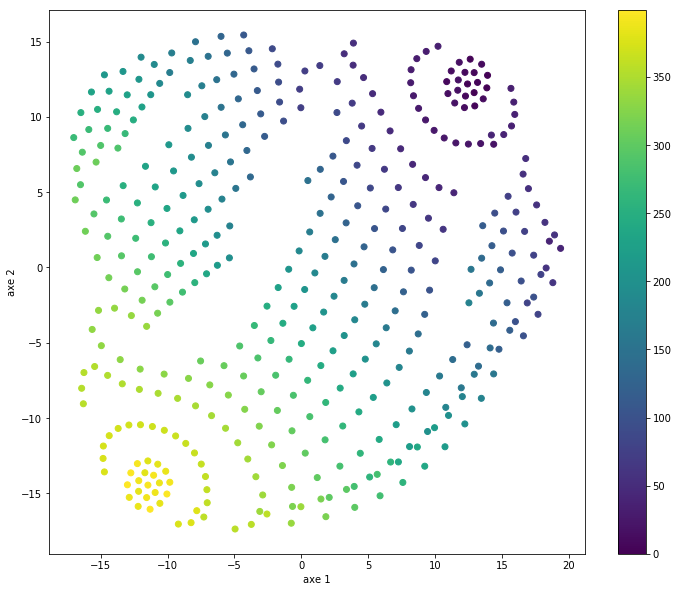

In [19]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X_embedded[:,0],X_embedded[:,1],  c = range(len(xs)), marker='o')

ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')
fig.colorbar(points)

plt.show()

In [41]:
mat.shape

(3, 400)

In [55]:
%%timeit
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(np.random.rand(1000,300))
X_embedded.shape

8.23 s ± 1.53 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


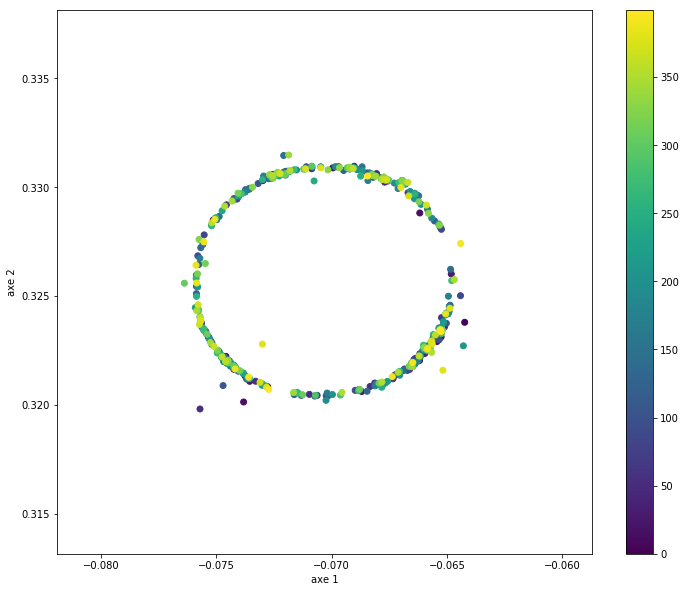

In [46]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X_embedded[:,0],X_embedded[:,1],  c = range(len(xs)), marker='o')

ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')
fig.colorbar(points)

plt.show()

(400, 2)

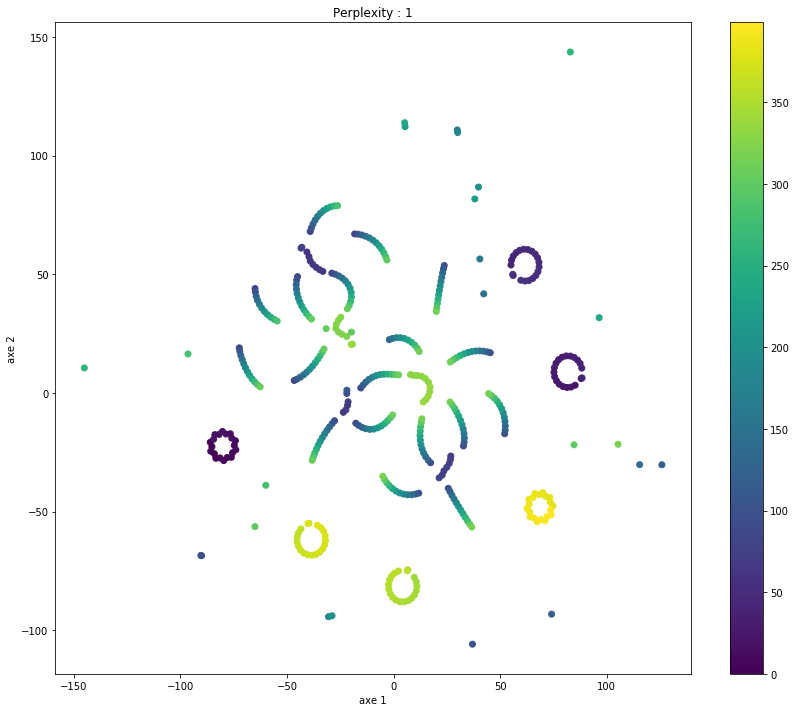

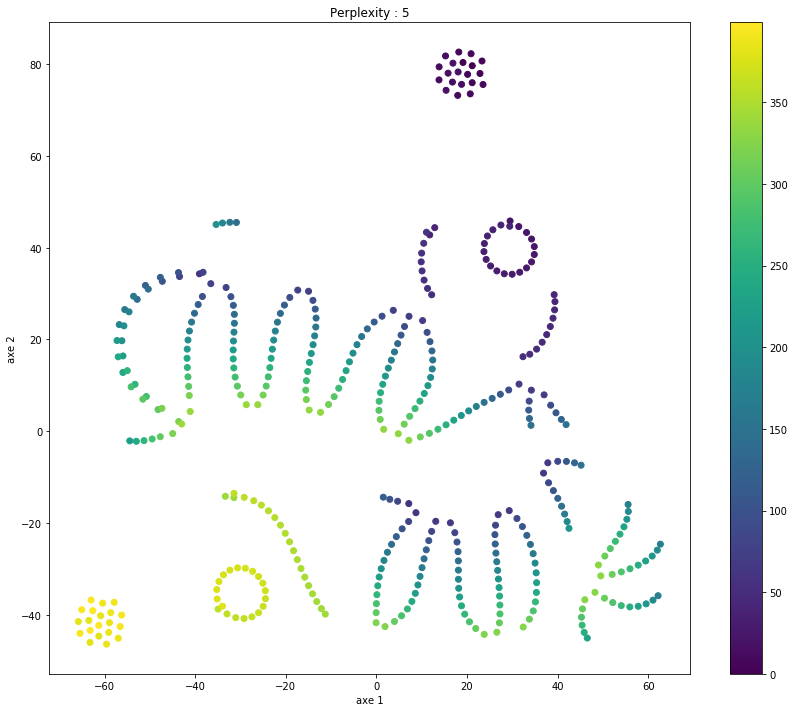

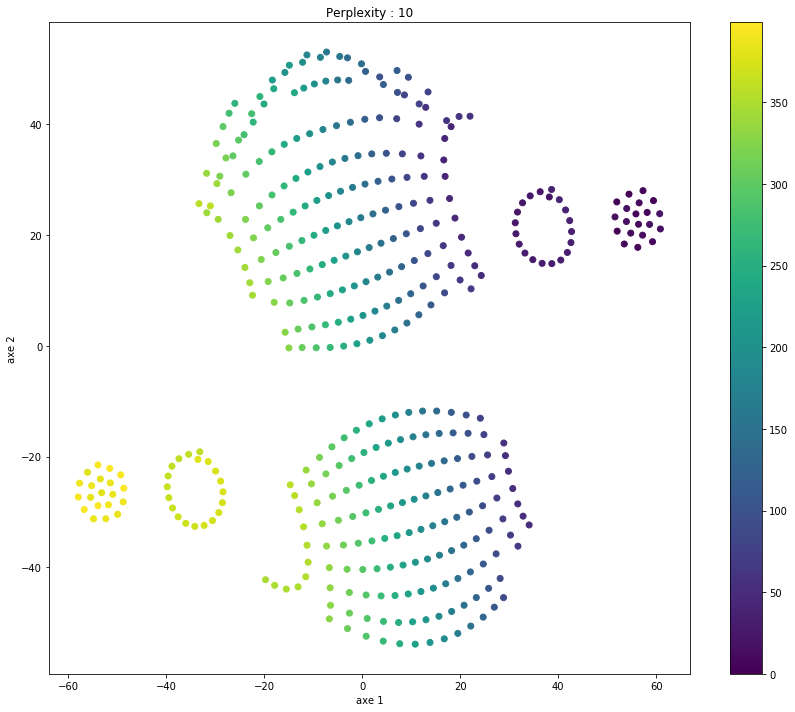

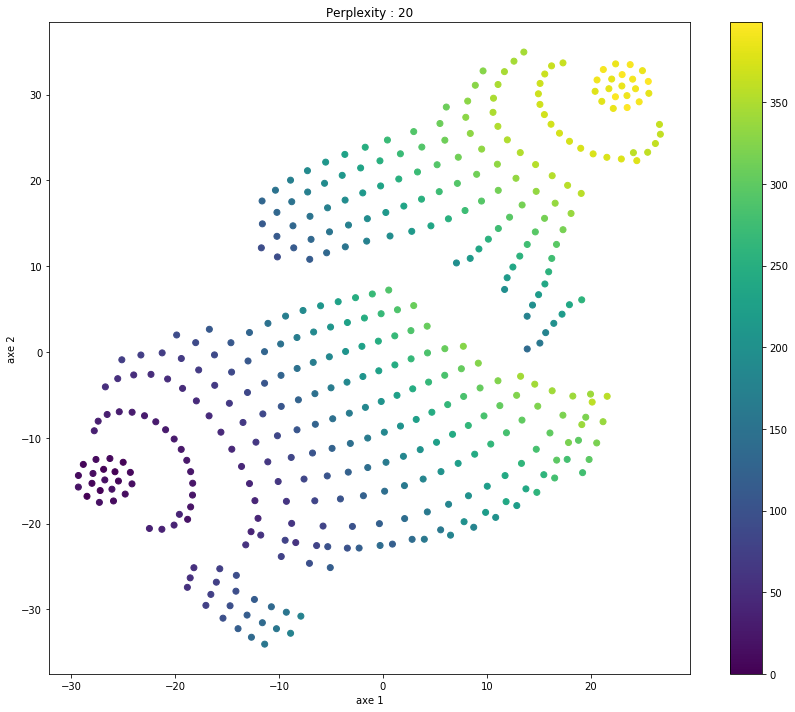

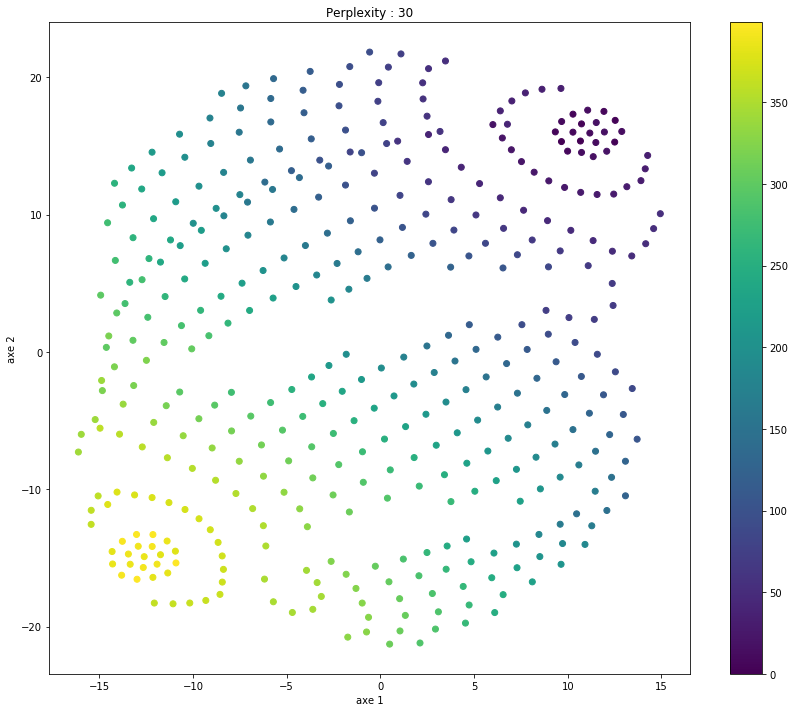

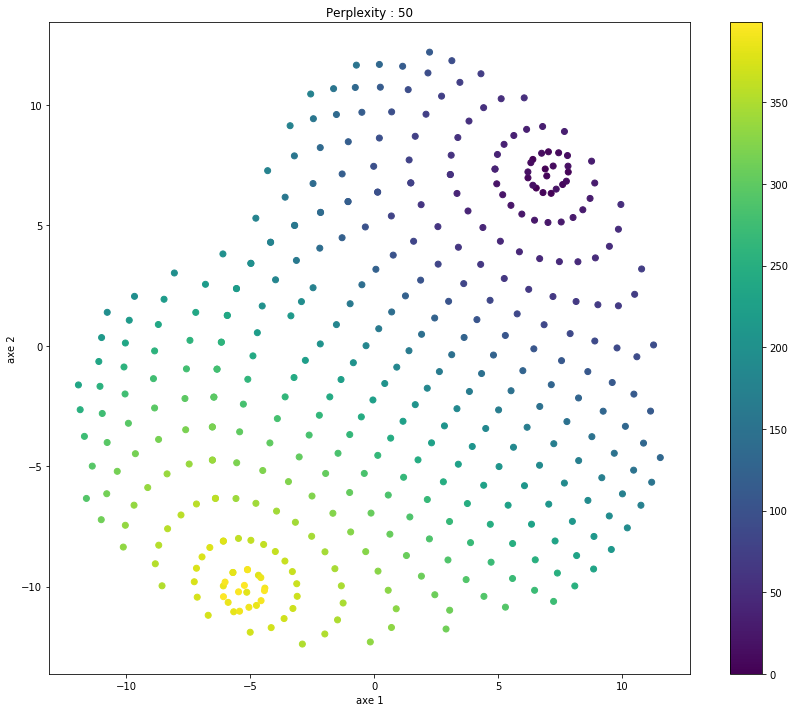

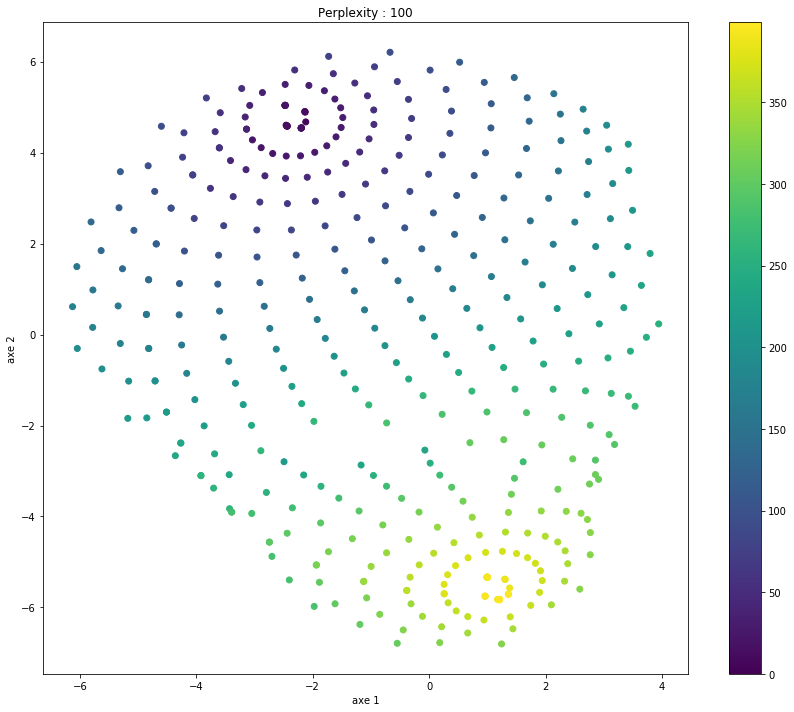

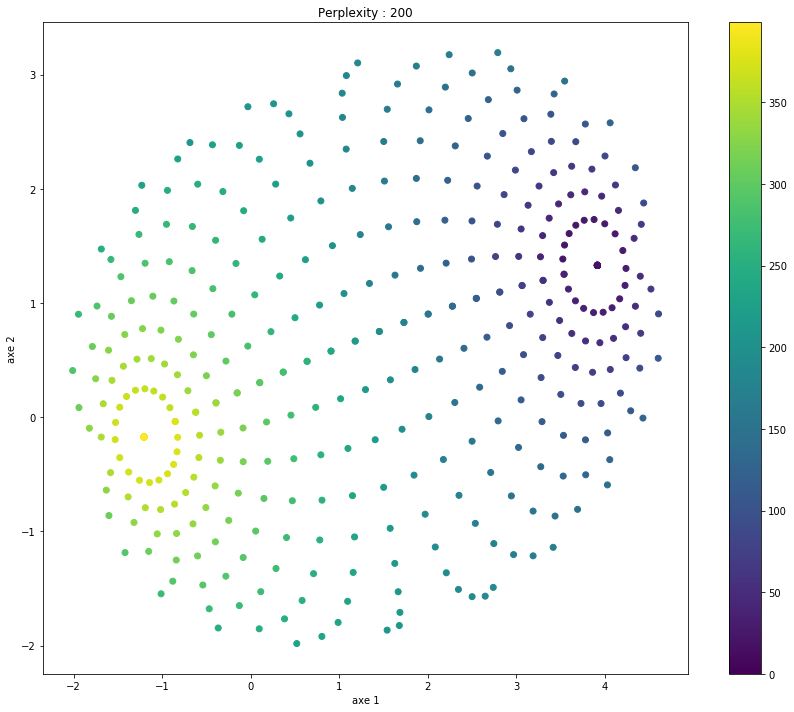

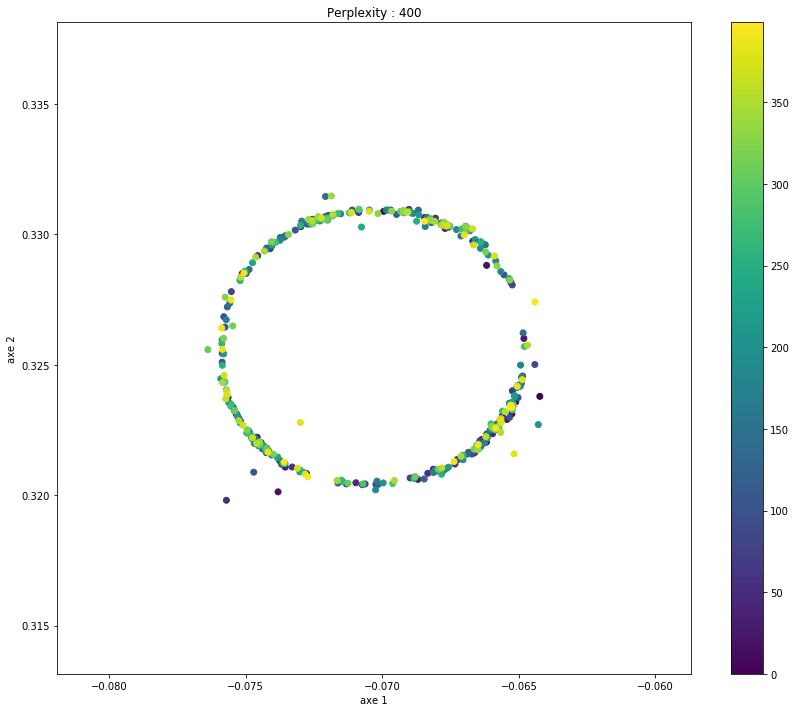

In [36]:
for p in [1,5,10,20,30,50,100,200,400]:
    X_embedded = TSNE(n_components=2, perplexity=p).fit_transform(np.transpose(mat))
    X_embedded.shape
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)

    ax.scatter(X_embedded[:,0],X_embedded[:,1],  c = range(len(xs)), marker='o')

    ax.set_xlabel('axe 1')
    ax.set_ylabel('axe 2')
    fig.colorbar(points)
    plt.title('Perplexity : {}'.format(p))
    fig.tight_layout()
    plt.savefig('./img/tSNE_sphere_p{}.jpg'.format(p))
    plt.show()

# Test PCA

In [37]:
from sklearn.decomposition import PCA
PCA(n_components=2).fit_transform(np.transpose(mat))

X_embedded.shape

(400, 2)

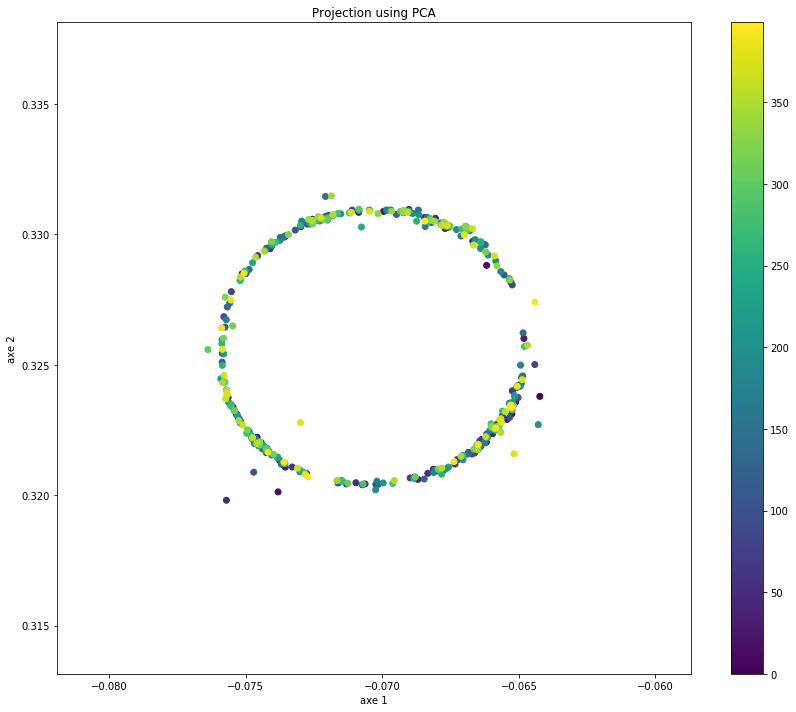

In [39]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X_embedded[:,0],X_embedded[:,1],  c = range(len(xs)), marker='o')

ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')
fig.colorbar(points)
plt.title('Projection using PCA'.format(p))
fig.tight_layout()
plt.savefig('./img/PCA_sphere.jpg'.format(p))
plt.show()